In [1]:
import polars as pl

csv_path = "../data/pubmed_baseline/merged_output.csv" 
df = pl.read_csv(csv_path)

In [2]:
print(df.head())

shape: (5, 7)
┌──────────┬───────────────┬───────────────┬───────────────┬────────┬───────────────┬──────────────┐
│ PMID     ┆ Title         ┆ Abstract      ┆ Authors       ┆ Year   ┆ Journal       ┆ Keyword      │
│ ---      ┆ ---           ┆ ---           ┆ ---           ┆ ---    ┆ ---           ┆ ---          │
│ i64      ┆ str           ┆ str           ┆ str           ┆ f64    ┆ str           ┆ str          │
╞══════════╪═══════════════╪═══════════════╪═══════════════╪════════╪═══════════════╪══════════════╡
│ 14037354 ┆ A note on the ┆ A             ┆ C H PLAICE    ┆ 1961.0 ┆ Journal of    ┆ CARBOHYDRASE │
│          ┆ determination ┆ modification  ┆               ┆        ┆ clinical      ┆ S/blood      │
│          ┆ of…           ┆ of the method ┆               ┆        ┆ pathology     ┆              │
│          ┆               ┆ o…            ┆               ┆        ┆               ┆              │
│ 14037399 ┆ Retention as  ┆ The effects   ┆ L POSTMAN     ┆ 1962.0 ┆ Science

In [8]:
filtered_df_2020 = df.filter(df["Year"] > 2020)
filtered_df_2015 = df.filter(df["Year"] > 2015)

In [9]:
print(f'Number of rows in 2020: {filtered_df_2020.shape[0]}')
print(f'Number of rows in 2015: {filtered_df_2015.shape[0]}')
print(f'Number of rows in original df: {df.shape[0]}')

Number of rows in 2020: 5320949
Number of rows in 2015: 10229049
Number of rows in original df: 26427451


/tmp/ipykernel_2802036/1741254810.py:11: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  df_grouped = df_filtered.group_by("Year").count().sort("Year")


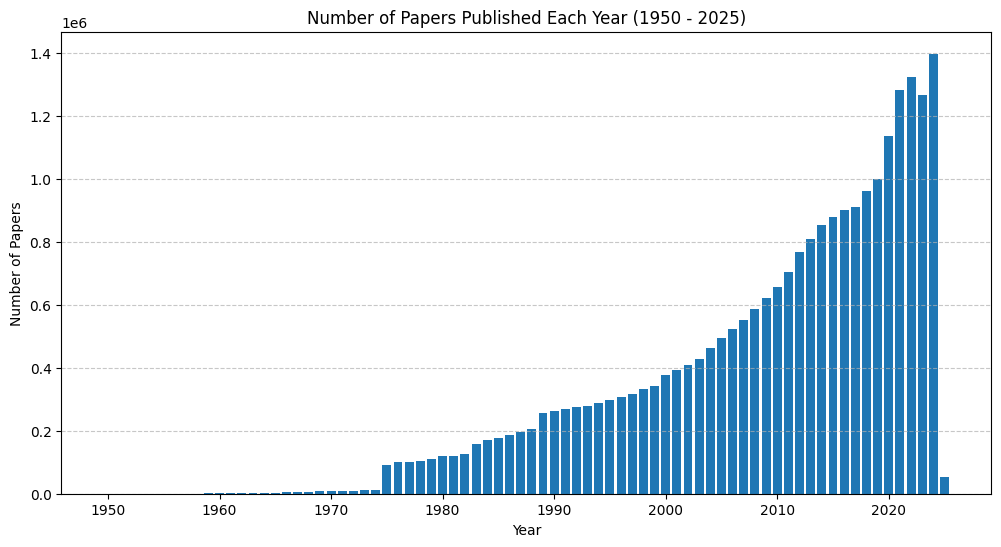

In [ ]:
import polars as pl
import matplotlib.pyplot as plt

# Filter the dataframe for the year range 1950 - 2025
df_filtered = df.filter((df["Year"].is_not_null()) & (df["Year"] >= 1950) & (df["Year"] <= 2025))

# Ensure the Year column is of type Int32 and remove None values
df_filtered = df_filtered.with_columns(df_filtered["Year"].cast(pl.Int32)).drop_nulls("Year")

# Count the number of papers published each year
df_grouped = df_filtered.group_by("Year").count().sort("Year")

# Ensure Year is a pure Python integer type
years = [int(y) for y in df_grouped["Year"].to_list()]
paper_counts = df_grouped["count"].to_list()

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(years, paper_counts, width=0.8)
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.title("Number of Papers Published Each Year (1950 - 2025)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
